From Homework 3, I have already come up with the data needed. I stored the data in hw4.xlsx and let us first read it

**Note**: Label = 0 when the company underperforms and label = 1 when it outperforms

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
train_data = pd.read_excel('hw4.xlsx', index_col = 0)
import matplotlib.pyplot as plt

In [20]:
train_data

,Symbol,X1,X2,X3,Return,Spy Return,Label
Company,,,,,,,
Broadcom Inc.,AVGO,-31.79,1.29,-1.66,-12.072278,-5.540622,0
Meta Platforms Inc. Class A,FB,-7.05,0.41,10.89,-7.401708,-5.540622,0
Accenture Plc Class A,ACN,7.45,2.29,13.79,-14.730144,-5.540622,0
United Parcel Service Inc. Class B,UPS,-2.63,-10.57,89.73,-5.795475,-5.540622,0
Alphabet Inc. Class C,GOOG,-5.99,2.27,16.55,-6.075080,-5.540622,0
Abbott Laboratories,ABT,-23.32,1.05,25.70,-8.584949,-5.540622,0
Danaher Corporation,DHR,-9.56,1.30,11.53,-12.634503,-5.540622,0
Walt Disney Company,DIS,-133.31,-0.74,-113.54,-8.252583,-5.540622,0
Lowe's Companies Inc.,LOW,0.58,67.70,-15.10,-8.429786,-5.540622,0


In [21]:
#train data
X_train = train_data.iloc[:,1:4]
X_train

,X1,X2,X3
Company,,,
Broadcom Inc.,-31.79,1.29,-1.66
Meta Platforms Inc. Class A,-7.05,0.41,10.89
Accenture Plc Class A,7.45,2.29,13.79
United Parcel Service Inc. Class B,-2.63,-10.57,89.73
Alphabet Inc. Class C,-5.99,2.27,16.55
Abbott Laboratories,-23.32,1.05,25.70
Danaher Corporation,-9.56,1.30,11.53
Walt Disney Company,-133.31,-0.74,-113.54
Lowe's Companies Inc.,0.58,67.70,-15.10


In [23]:
y_train = train_data[['Label']]
y_train

,Label
Company,
Broadcom Inc.,0
Meta Platforms Inc. Class A,0
Accenture Plc Class A,0
United Parcel Service Inc. Class B,0
Alphabet Inc. Class C,0
Abbott Laboratories,0
Danaher Corporation,0
Walt Disney Company,0
Lowe's Companies Inc.,0


### Building a Classifier

Then we should initialize the decision tree classifier. According to the lecture, the decision tree classifier would have following properties:

1. Every time we choose the feature with highest entropy reduction and split current nodes into 2

2. We control the maximum depth to be 3

[Text(0.5769230769230769, 0.875, 'X[2] <= 6.005\nentropy = 0.993\nsamples = 40\nvalue = [22, 18]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= -20.24\nentropy = 0.902\nsamples = 22\nvalue = [7, 15]'),
 Text(0.15384615384615385, 0.375, 'X[1] <= -0.215\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.46153846153846156, 0.375, 'X[1] <= 39.765\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [1, 12]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8461538461538461, 0.625, 'X[1] <= 0.39\nentropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(0.7692307692307693, 0.375, 'X[0] <= -2.155\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]

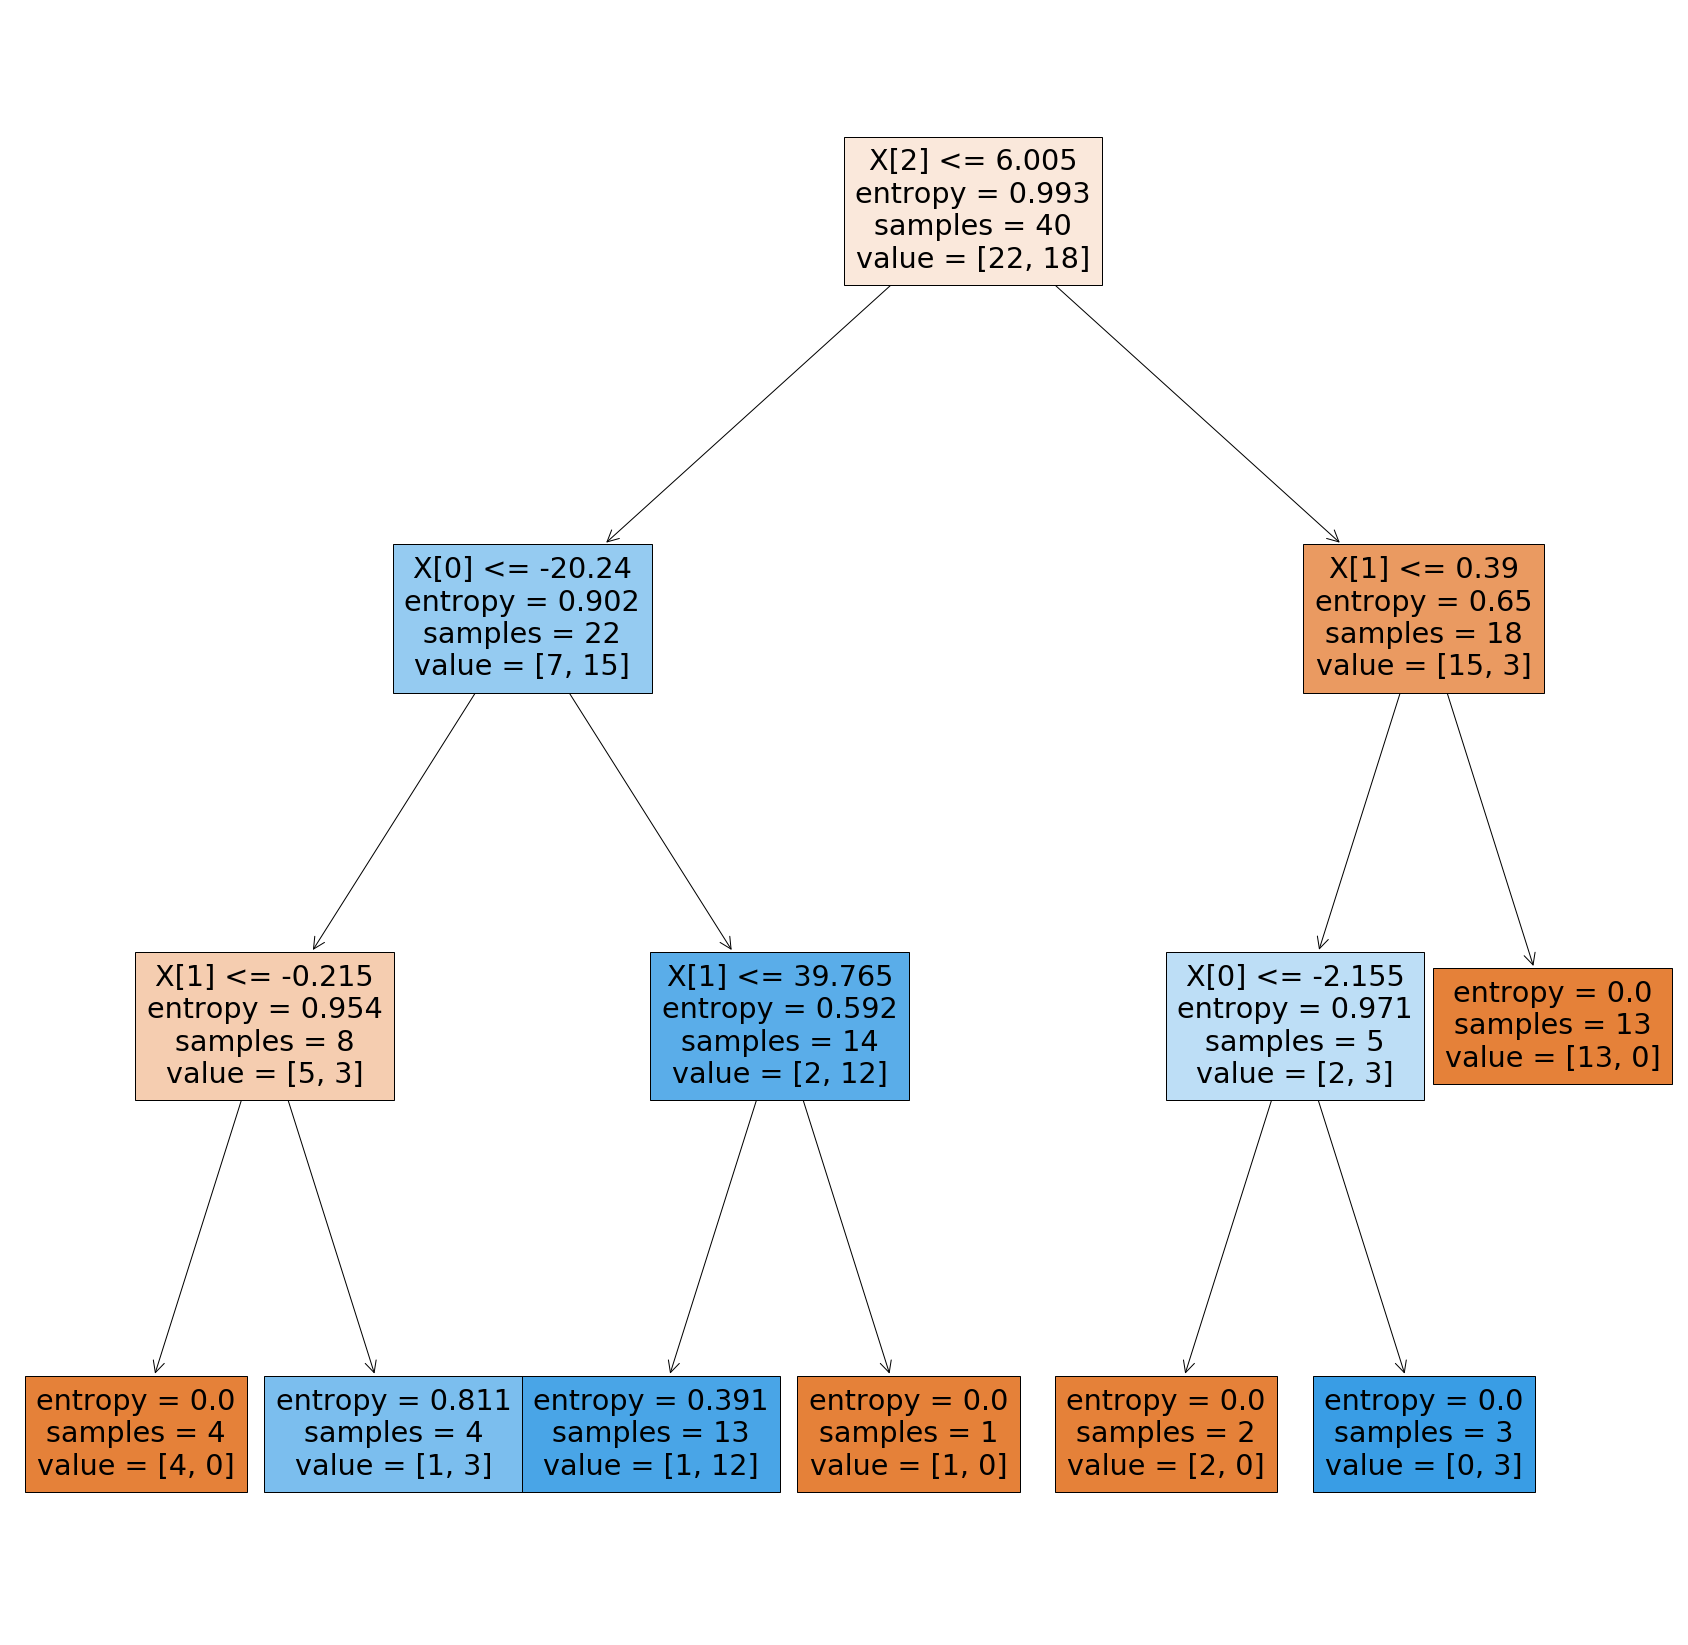

In [29]:
clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 3)
clf.fit(X_train, y_train)
_, ax = plt.subplots(figsize=(30,30))
tree.plot_tree(clf,filled=True, ax=ax)


From above, we can see how the best splitting strategy works and what the entropies are for every leaf node

### Testing data

#### Testing error

In [35]:
test_data = pd.read_excel('hw4.xlsx', sheet_name = 1, index_col = 0)
test_data

,Symbol,X1,X2,X3,Return,Spy Return,Label
Company,,,,,,,
Johnson & Johnson,JNJ,0.82,-0.02,-23.56,1.222012,-5.540622,1
salesforce.com inc.,CRM,61.64,0.17,107.49,-8.776123,-5.540622,0
Intel Corporation,INTC,0.21,-0.38,4.88,-5.479190,-5.540622,1
Costco Wholesale Corporation,COST,4.43,4.13,17.97,-10.601211,-5.540622,0
Comcast Corporation Class A,CMCSA,-7.32,-0.41,-1.44,0.020012,-5.540622,1
McDonald's Corporation,MCD,-5.12,-23.10,19.02,-3.725548,-5.540622,1
Home Depot Inc.,HD,2.75,-2.08,-0.88,-11.904361,-5.540622,0
Walmart Inc.,WMT,21.70,0.28,-101.80,-2.909724,-5.540622,1
Visa Inc. Class A,V,-6.24,-1.90,-29.59,3.976643,-5.540622,1


In [36]:
X_test = test_data.iloc[:,1:4]
y_test = test_data[['Label']]

In [37]:
X_test

,X1,X2,X3
Company,,,
Johnson & Johnson,0.82,-0.02,-23.56
salesforce.com inc.,61.64,0.17,107.49
Intel Corporation,0.21,-0.38,4.88
Costco Wholesale Corporation,4.43,4.13,17.97
Comcast Corporation Class A,-7.32,-0.41,-1.44
McDonald's Corporation,-5.12,-23.10,19.02
Home Depot Inc.,2.75,-2.08,-0.88
Walmart Inc.,21.70,0.28,-101.80
Visa Inc. Class A,-6.24,-1.90,-29.59


In [38]:
y_test

,Label
Company,
Johnson & Johnson,1
salesforce.com inc.,0
Intel Corporation,1
Costco Wholesale Corporation,0
Comcast Corporation Class A,1
McDonald's Corporation,1
Home Depot Inc.,0
Walmart Inc.,1
Visa Inc. Class A,1


In [39]:
pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6

Thus, the accuracy is 0.6

#### Confusion Matrix of testing data

In [45]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [46]:
y_test

,Label
Company,
Johnson & Johnson,1
salesforce.com inc.,0
Intel Corporation,1
Costco Wholesale Corporation,0
Comcast Corporation Class A,1
McDonald's Corporation,1
Home Depot Inc.,0
Walmart Inc.,1
Visa Inc. Class A,1


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred, labels = [0,1])

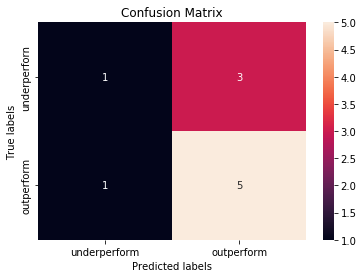

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['underperform', 'outperform']); ax.yaxis.set_ticklabels(['underperforn', 'outperform']);